In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from PyAstronomy.pyTiming import pyPDM
import plotly.graph_objects as go
import math

data_1002 = pd.read_csv('20231002_p4/20231002.csv')
data_1023 = pd.read_csv('20231023_p4/20231023.csv')
data_1026 = pd.read_csv('20231026_p2/20231026.csv')
data_1027 = pd.read_csv('20231027_p3/20231027.csv')
data_1028 = pd.read_csv('20231028_p3/20231028.csv')

time = [data_1002['J.D.-2400000'], data_1023['J.D.-2400000'], data_1026['J.D.-2400000'], data_1027['J.D.-2400000'], data_1028['J.D.-2400000']]
flux = [data_1002['rel_flux_T1'], data_1023['rel_flux_T1'], data_1026['rel_flux_T1'], data_1027['rel_flux_T1'], data_1028['rel_flux_T1']]
mag = [data_1002['Source_AMag_T1'], data_1023['Source_AMag_T1'], data_1026['Source_AMag_T1'], data_1027['Source_AMag_T1'], data_1028['Source_AMag_T1']]
mag_err = [data_1002['Source_AMag_Err_T1'], data_1023['Source_AMag_Err_T1'], data_1026['Source_AMag_Err_T1'], data_1027['Source_AMag_Err_T1'], data_1028['Source_AMag_Err_T1']]
err = [data_1002['rel_flux_err_T1'], data_1023['rel_flux_err_T1'],data_1026['rel_flux_err_T1'], data_1027['rel_flux_err_T1'], data_1028['rel_flux_err_T1']]

print(time)

[0     60220.586906
1     60220.587424
2     60220.587943
3     60220.588461
4     60220.588978
          ...     
85    60220.634896
86    60220.635414
87    60220.635931
88    60220.636449
89    60220.636967
Name: J.D.-2400000, Length: 90, dtype: float64, 0      60241.533327
1      60241.533499
2      60241.533670
3      60241.533840
4      60241.534011
           ...     
242    60241.597747
243    60241.597919
244    60241.598092
245    60241.598266
246    60241.598443
Name: J.D.-2400000, Length: 247, dtype: float64, 0    60244.564563
1    60244.568321
Name: J.D.-2400000, dtype: float64, 0      60245.521346
1      60245.535186
2      60245.535729
3      60245.535914
4      60245.536466
           ...     
531    60245.646705
532    60245.646889
533    60245.647073
534    60245.647256
535    60245.647440
Name: J.D.-2400000, Length: 536, dtype: float64, 0       60246.549828
1       60246.550764
2       60246.550891
3       60246.551017
4       60246.551143
            ...     
1342  

Text(0, 0.5, 'relative flux')

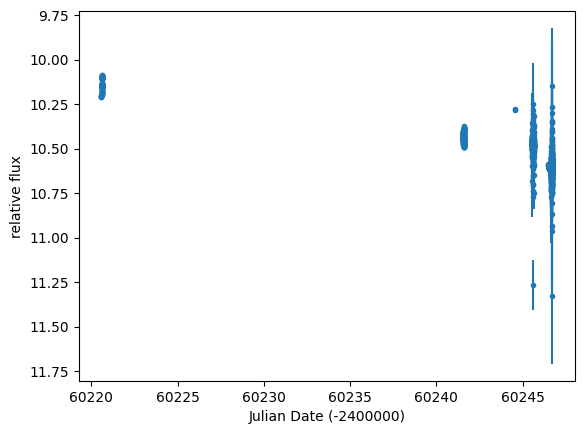

In [6]:
# plot everything
fig, ax = plt.subplots()

plt.errorbar(pd.concat(time[0:]), pd.concat(mag[0:]), yerr=pd.concat(mag_err[0:]), fmt="o", markersize = 3)
# plt.scatter(pd.concat(time[0:]), pd.concat(mag[0:]))
plt.gca().invert_yaxis()

ax.set_xlabel("Julian Date (-2400000)")
ax.set_ylabel("relative flux")


In [5]:
# PDM

fig4 = {}
# f1 = {}
# f2 = {}
# t1 = {}
# t2 = {}
modetxt = ['period', 'frequency']
descrx = ['Period (days)', 'Frequency (1/day)']
moden = 0
cover = 3
periodsearch = [1, 1000, 0.1]

x = pd.concat(time[0:])
y = pd.concat(mag[0:])

bins = math.floor(np.sqrt(len(x)))

#     bins = 10

#     x = np.random.rand(100)
#     print(x)
#     y = numpy.sin(x*2.0*numpy.pi*3.0 + 1.7)

#     print(y)

#     Get a ``scanner'', which defines the frequency interval to be checked.
#     Alternatively, also periods could be used instead of frequency.

S = pyPDM.Scanner(minVal=periodsearch[0], maxVal=periodsearch[1], dVal=periodsearch[2], mode=modetxt[moden])

# Carry out PDM analysis. Get frequency array
# (f, note that it is frequency, because the scanner's
# mode is ``frequency'') and associated Theta statistic (t).
# Use 10 phase bins and 3 covers (= phase-shifted set of bins).
P = pyPDM.PyPDM(x,y)

f1, t1 = P.pdmEquiBinCover(bins, cover, S)

# For comparison, carry out PDM analysis using 10 bins equidistant
# bins (no covers).
f2, t2 = P.pdmEquiBin(bins, S)

KeyError: '[1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171, 2172, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2221, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978] not in index'

In [ ]:
#
# THIS PLOTS THE PDM ANALYSIS. 
#


fig4 = go.Figure()
fig4 = fig4[h].add_trace(go.Scatter(x = (f1[h]),y = t1[h], name = "pdmEquiBinCover", mode = 'lines'))
fig4 = fig4[h].add_trace(go.Scatter(x = (f2[h]),y = t2[h], name = "pdmEquiBin", mode = 'lines'))
fig4.update_layout(xaxis_title = descrx[moden], yaxis_title = 'Theta', title_text='Result of PDM analysis in ' + str(peakforradvel[h]) + ' using RV')
fig4.show()
fig4.write_html("code_output/"+timestr+"/PDM_plots/"+"PDM_RV_"+folder+"_"+str(peakforradvel[h])+"_from_"+str(periodsearch[0])+"d_to_"+str(periodsearch[1])+"d_withdel_"+str(periodsearch[2])+"d.html")